This is a tutorial on how to use this 2D FMM RCWA code.

In [8]:
import RCWA_project.base as base
import RCWA_project.classes as classes
import RCWA_project.fields as fields
import numpy as np
import matplotlib.pyplot as plt

# Simple imports

In [14]:
# Computation parameters: nb of modes and stretching coefficient
Mm = 49
# Nm = 8
# eta = 0.999 # between 0 and 1 (but never exactly 1) Empirically, very close to 1 works really well

# Structure parameters: size of a MIM resonator
hcube = 70.0               # height of the cube
hspacer = 1.0            # height of the spacer
l_cubex = 70.0           # cube width along axis x
hgold = 50.0
# l_cubey = 70.0           # cube width along axis y
period = 300.1
space_x = (period-l_cubex)/2     # period along x (RCWA nerd advice, never use an exactly round period)
# space_y = 300-l_cubey     # period along x (RCWA nerd advice, never use an exactly round period)

eps_dielec = 1.0**2        # spacer permittivity
metal_perm = "Gold"   # metal permittivity

# Incidence parameters
lambdas = np.linspace(500, 1600.2, 100) # Being a 3D simulation, each point in parameter space can take a few seconds on a reasonable computer


# Results will be saved here
r = np.zeros(len(lambdas), dtype=complex)

[0, 115.05000000000001, 185.05, 300.1]
Debugg compute_field, k0 1.5417693464305757, , kx 0.00026908951264919043, kx/k0 0.0001745329243133368, period 300.1, wav 1223
Debug compute_field_1D, S down 4 2
Debug compute_field_1D, S down 4 1
Debug compute_field_1D, S down 4 0
Debugg compute_field_1D, shapes 4 4
sizes [200. 700.  10. 500.] 300
Debugg layer_field, A  [-1.64520645  1.61240678 -1.2539111  -2.09764528  1.46344221 -1.52476082
  1.87223299  0.73666242 -1.73843806  1.57571782 -1.34489717 -2.91809584
  1.32009945 -1.62524631  1.71125018 -0.39560873 -1.92519838  1.44522982
 -1.52056175  2.27400623  1.09319184 -1.77527516  1.52648093 -1.18465801
 -2.18911089  1.28477407 -1.71226885  1.71923027  0.79473394 -1.9333435
  1.33412445 -1.61929904 -2.53915695  1.14670794 -1.89320353  1.35643252
  0.21674273 -2.03030785  1.18180107 -1.91417288  1.71002295  1.11556846
 -1.99208252  1.15750815 -2.00649853 -1.89255125  1.3025213  -1.77100742
  0.77375357  0.84069922  0.77458548 -1.7703443   1.3025

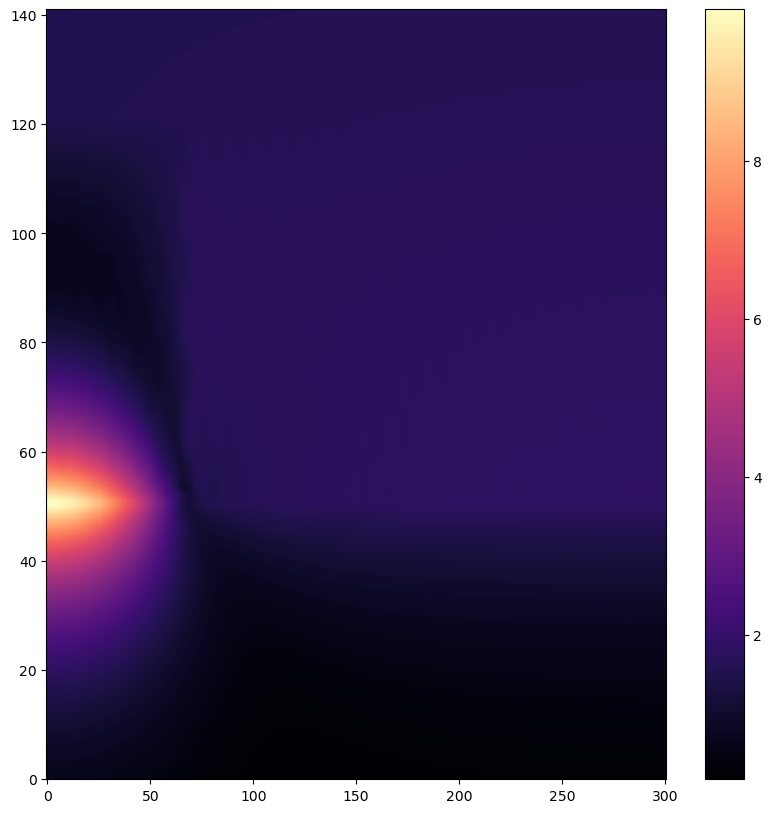

In [17]:
pmlx=[0, 0]
interfaces = [0,space_x,l_cubex+space_x, l_cubex + 2*space_x]
print(interfaces)
# nx = [0,l_cubex,l_cubex+space_x]

Air = classes.Material(1.0)
SiO2 = classes.Material(eps_dielec)
Gold = classes.Material(metal_perm)

# The top layer (air)
top_layer =  np.array([Air,Air,Air])
# The substrate layer (gold)
gold_layer =  np.array([Gold,Gold,Gold])
# The substrate layer (gold)
bot_layer =  np.array([Air,Air,Air])
# The spacer layer (dielectric)
spacer_layer =  np.array([SiO2,SiO2,SiO2])
# The cube layer, structured
gp_layer = np.array([Air, Gold,Air])

layers = [top_layer, gp_layer, spacer_layer, gold_layer]#, bot_layer]
thicknesses = [20, hcube, hspacer, hgold]#, 20]
homo_layer = [1, 0, 1, 1, 1]

# wav = 50

# layers = [top_layer, spacer_layer]#, top_layer]
# thicknesses = [period/3.2, period/1.22]#, period/3, period/4.]
# homo_layer = [1, 1]#, 1]
pmls = pmlx
structure = classes.Structure(layers, thicknesses, interfaces, homo_layer, pmls)

Rs = []
Ts = []
modes = Mm
theta = 0.01 * np.pi/180.
pol = 1
incidence = [theta, pol]
# for i, lambd in enumerate(lambdas):
#     print(lambd)
#     r, t, R, T = fields.coefficient_1D(structure, lambd, incidence, modes)
#     Rs.append(R)
#     Ts.append(T)
#     # Now that everything is defined, we can compute the modes in each structure!

# plt.plot(lambdas, Rs)
# plt.plot(lambdas, Ts)

zres = 0.1
xres = 1
x, z, map = fields.compute_field_1D(structure, 1223, incidence, zres, xres, modes)
plt.figure(figsize=(10, 10))
plt.pcolor(x, z, np.abs(map), cmap="magma")
plt.colorbar()

# plt.figure(2)
# plt.plot(np.angle(map[:,0]))

In [7]:
pmlx=[0, 0]
pmly=[0, 0]
ox = [0,l_cubex,l_cubex+space_x]
nx = [0,l_cubex,l_cubex+space_x]
oy = [0,l_cubey,l_cubey+space_y]
ny = [0,l_cubey,l_cubey+space_y]

Air = classes.Material(1.0)
SiO2 = classes.Material(eps_dielec)
Gold = classes.Material(metal_perm)

# The top layer (air)
top_layer =  np.array([[Air,Air],
                    [Air,Air]])

# The substrate layer (gold)
bot_layer =  np.array([[Gold,Gold],
                    [Gold,Gold]])


# The spacer layer (dielectric)
spacer_layer =  np.array([[SiO2,SiO2],
                    [SiO2,SiO2]])

# The cube layer, structured
gp_layer = np.array([[Gold,Air],
                    [Air,Air]])

layers = [top_layer, gp_layer, spacer_layer, bot_layer]
thicknesses = [0, hcube, hspacer, 0]
homo_layer = [1, 0, 1, 1]
interfaces = [ox, oy]
pmls = [pmlx, pmly]
modes = [Mm, Nm]
structure = classes.Structure(layers, thicknesses, interfaces, homo_layer, pmls)


NameError: name 'l_cubey' is not defined

In [ ]:

for i, lambd in enumerate(lambdas):
    print(lambd)
    r, t, R, T = fields.coefficient_1D(structure, lambd, incidence, modes, eta)
    # Now that everything is defined, we can compute the modes in each structure!


7000.0


/home/denis/Documents/git/Code_RCWA/RCWA_project/base.py:472: ComplexWarning: Casting complex values to real discards the imaginary part
  V[int(ana_kz[3, i_mod])] = ana_kz[0, i_mod]
/home/denis/Documents/git/Code_RCWA/RCWA_project/base.py:502: ComplexWarning: Casting complex values to real discards the imaginary part
  for j in range(int(ana_kz[0, 0])):
/home/denis/Documents/git/Code_RCWA/RCWA_project/base.py:527: ComplexWarning: Casting complex values to real discards the imaginary part
  E[:n*m, int(ana_kz[3, j])] = alpha @ vtmp
/home/denis/Documents/git/Code_RCWA/RCWA_project/base.py:528: ComplexWarning: Casting complex values to real discards the imaginary part
  E[n*m:, int(ana_kz[3, j + np.shape(ana_kz)[1]//2])] = beta @ vtmp


7315.789473684211
7631.578947368421
7947.368421052632
8263.157894736842
8578.947368421053
8894.736842105263
9210.526315789473
9526.315789473683
9842.105263157895
10157.894736842105
10473.684210526317
10789.473684210527
11105.263157894737
11421.052631578947
11736.842105263157
12052.631578947368
12368.42105263158
12684.21052631579
13000.0


[0.89927318+0.j 0.94260273+0.j 0.96043266+0.j 0.95941944+0.j
 0.95371152+0.j 0.94351566+0.j 0.92611137+0.j 0.89471773+0.j
 0.83218157+0.j 0.69074565+0.j 0.35647139+0.j 0.01973491+0.j
 0.37056093+0.j 0.67794989+0.j 0.8135316 +0.j 0.8773931 +0.j
 0.91156449+0.j 0.93185562+0.j 0.9448901 +0.j 0.95377608+0.j]


/home/denis/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


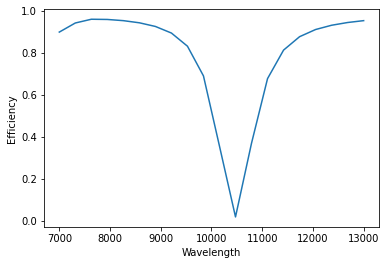

In [ ]:
print(r)
import matplotlib.pyplot as plt
plt.plot(lambdas, np.abs(r))
plt.xlabel("Wavelength")
plt.ylabel("Efficiency")
plt.show()